 📝문제 1
교육 수준 별로 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요.

 📝문제 2
인종(race)별로 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요.

 📝문제 3
연도(year)에 따른 임금(wage)의 변화 추이를 교육 수준(education)별로 나누어 시각화하고, 시각화 결과에서 알 수 있는 사실을 설명하세요

### #01.준비작업

#### 1-1 패키지 참조

In [1]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb



#### 1-2 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [3]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


#### 1-4 데이터 전처리

In [4]:
df1 = origin.astype({'year': 'category', 'maritl': 'category', 
'race': 'category', 'education': 'category', 'region': 
'category', 'jobclass': 'category', 'health': 'category', 
'health_ins': 'category'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


 📝문제 1
교육 수준 별로 나이와 임금의 관계를 탐색하기 위한 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요.

- 나이가 많을 수록 임금이 높아진다
- 학력이 높아질수록 평균 wage 가 높아진다
- 고등학교 졸업 미만인 집단에서는 wage 가 160을 넘는 경우가 없으며, 대부분 50-100 사이에 몰려있다. 
 (즉 고등학교 졸업 미만자 중에서는고소득자가 없다)
- some college 중에서도 300이상, Advanced Degree 와 비슷한 수준의 wage 를 받는 소수의 인원이 존재한다
- College Grad 의 wage 최대값은 모두 300 미만으로 타 집단에 비해 낮다
- Advanced Degree의 대부분 집단은 100-150 에 분포하지만, 260-270 사이의 wage를 받는 또 다른 집단이 확인된다

In [5]:
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

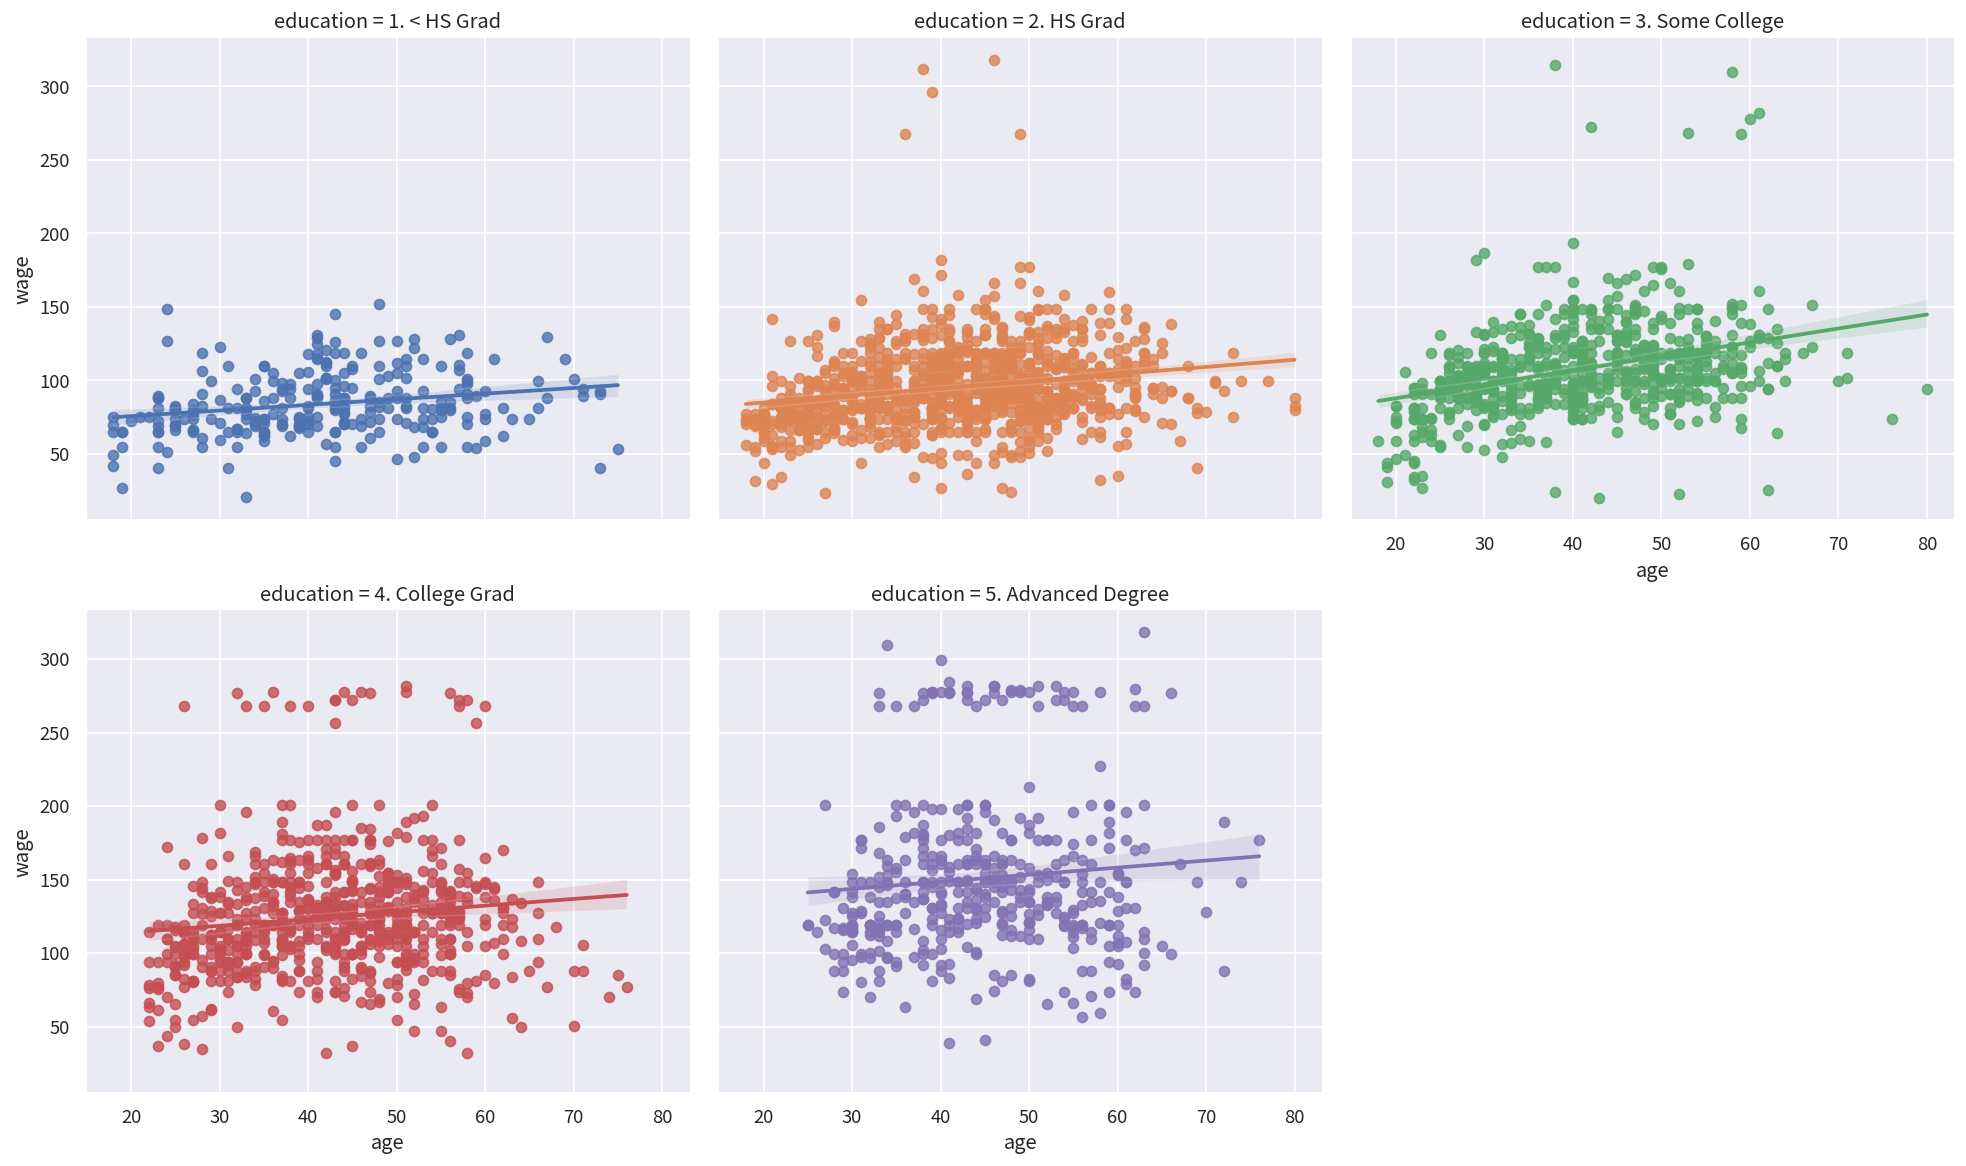

In [15]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 3000             # 그래프 가로 크기
height_px = 2000              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

#아래의 초기화 부분은 생략된다 
#fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LM plot 그리기
#그래프를 꾸미기 위해서는 LM PLOT () 메서드로부터 리턴되는 객체 g 를 활용해야 한다

g=sb.lmplot(data=df1 , x='age', y='wage',hue = 'education',col='education', col_wrap = 3)

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])

#두개의 그래프가 생성되면 각 그래프에 대해 그리드 설정은 별도로 필요하다
for ax in g.axes.flatten():
  ax.grid(True)



# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


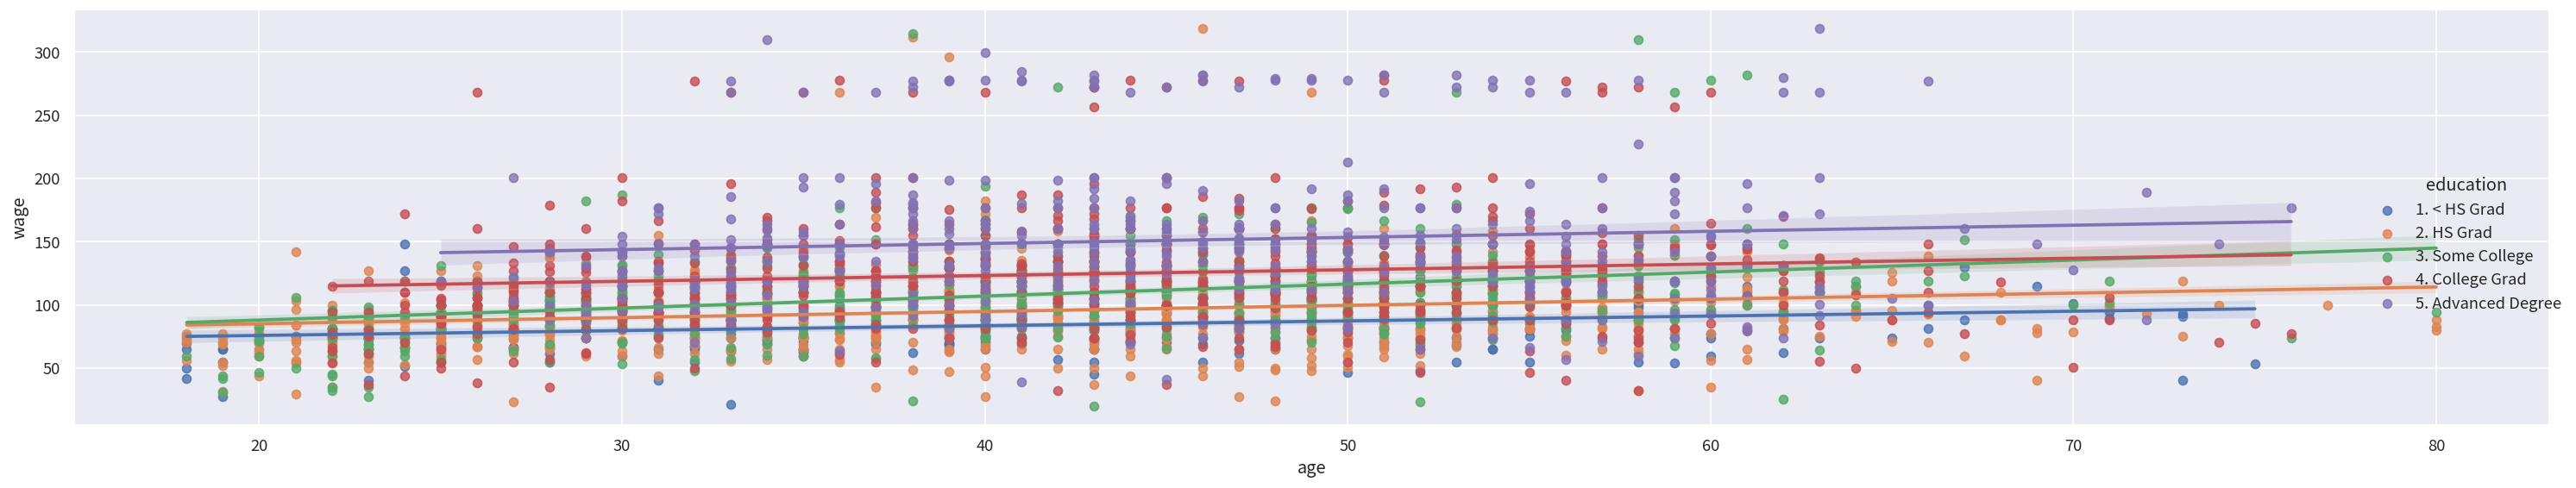

In [ ]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 3000             # 그래프 가로 크기
height_px = 2000              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

#아래의 초기화 부분은 생략된다 
#fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) LM plot 그리기
#그래프를 꾸미기 위해서는 LM PLOT () 메서드로부터 리턴되는 객체 g 를 활용해야 한다

g=sb.lmplot(data=df1 , x='age', y='wage',hue = 'education')

g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figwidth(figsize[1])

#두개의 그래프가 생성되면 각 그래프에 대해 그리드 설정은 별도로 필요하다
for ax in g.axes.flatten():
  ax.grid(True)



# 3) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


 📝문제 2
인종(race)별로 직업군(jobclass)에 따른 임금(wage) 분포를 비교할 수 있는 시각화를 구현하고, 시각화 결과에서 알 수 있는 사실을 설명하세요.


- 현장직과 사무직 모두 White 의 wage 가 타 인종보다 높다
- 현장직의 white 봉우리는 100보다 좌측에 위치하지만, 사무직의 white 봉우리는 100 보다 우측에 위치하여 평균적으로 white 더라도 사무직이 더 높은 wage 를 받는 다는 걸 알 수 있다
- 사무직의 경우, White 의 250-300 사이의 wage 수가 현장직보다 많다
- 사무직인 Asian 의 연봉이 전반적으로 현장직 Asian 보다 높다 (분포가 우측에 몰려있음)


In [8]:
jobclass = sorted(list(df1['jobclass'].unique()))
jobclass

['1. Industrial', '2. Information']

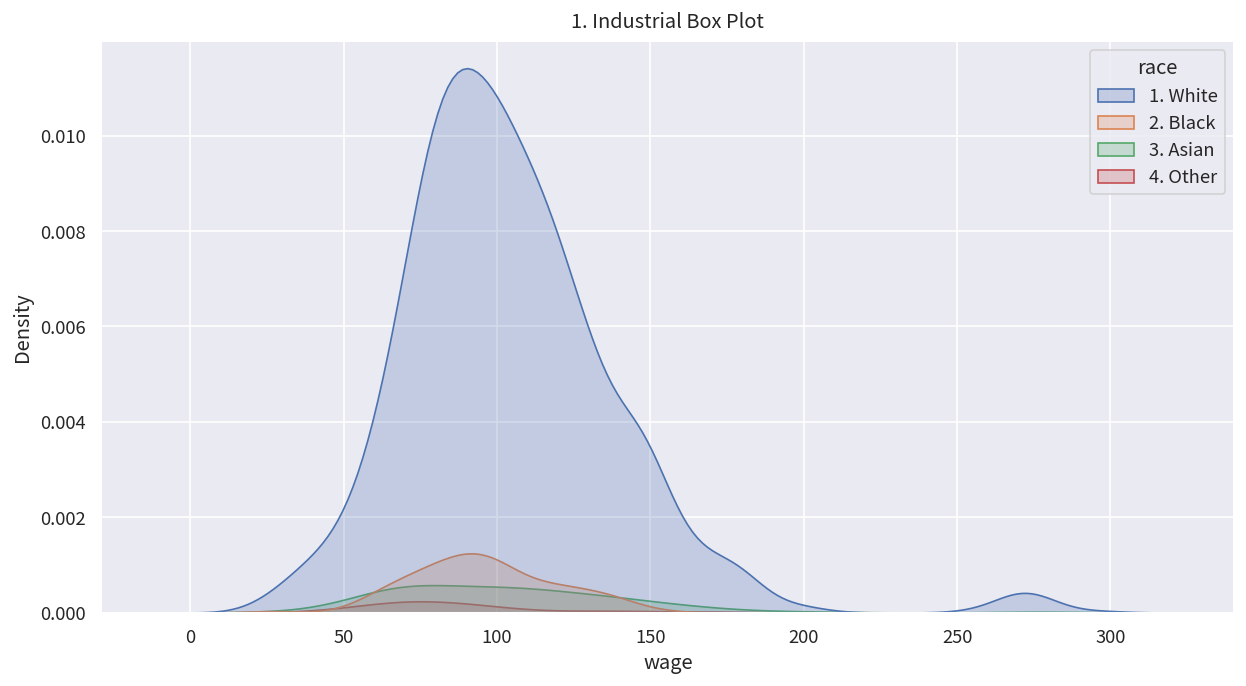

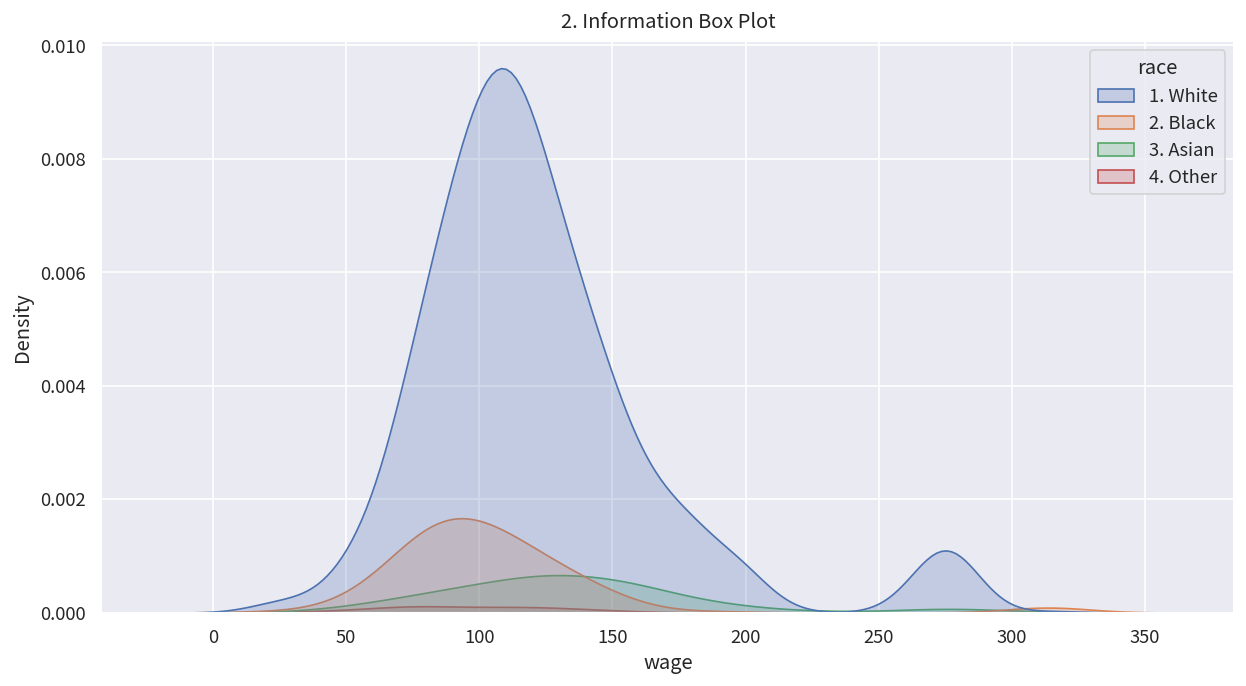

In [9]:


for j in jobclass :
  mdf = df1.query('jobclass == @j')

  #1) 그래프 초기화
  width_px  = 1280  # 그래프 가로 크기
  height_px = 720   # 그래프 세로 크기
  rows = 1          # 그래프 행 수
  cols = 1          # 그래프 열 수
  figsize = (width_px / my_dpi, height_px / my_dpi)
  fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

  # 2) KDE Plot 그리기
  sb.kdeplot(data=mdf ,x='wage',hue='race',fill=True)

  # 3) 그래프 꾸미기
  ax.set_title(j+" Box Plot", fontsize=12, pad=8)
  ax.grid(True)  
          
  # 4) 출력
  plt.tight_layout()      # 여백 제거
  plt.show()              # 그래프 화면 출력
  plt.close()             # 그래프 작업 종료



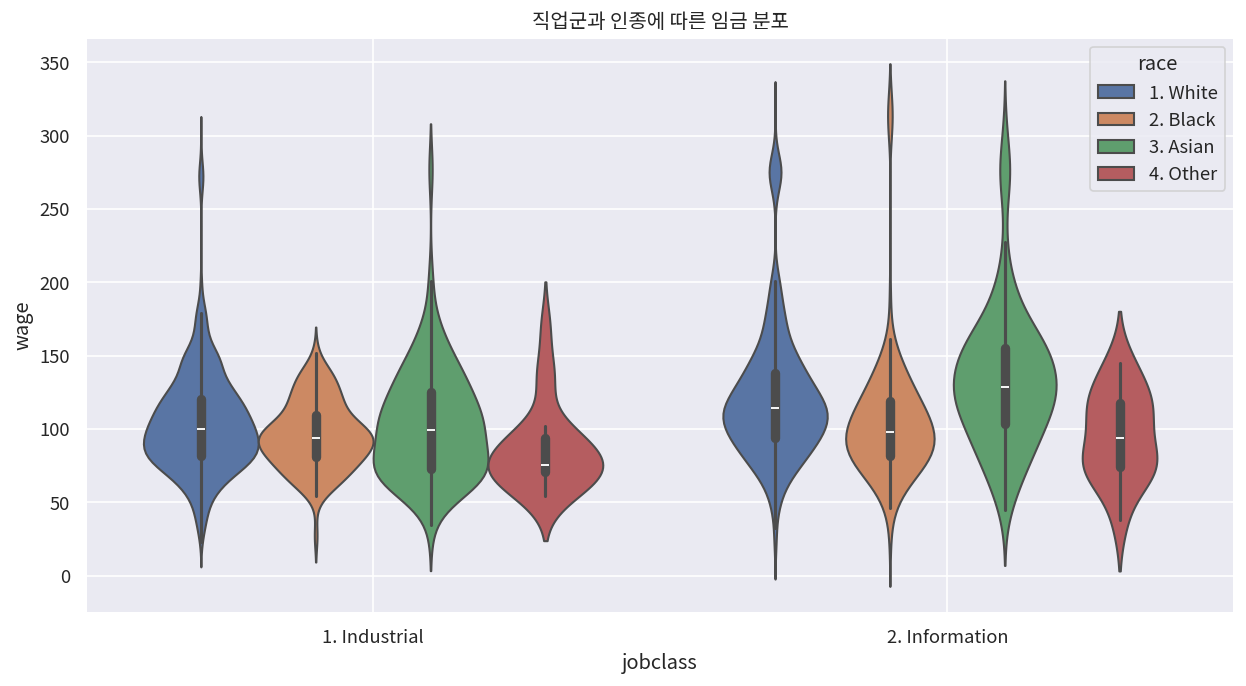

In [19]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Violin Plot 그리기
sb.violinplot(data=df1, x="jobclass", y='wage', hue='race')

# 3) 그래프 꾸미기
ax.set_title("직업군과 인종에 따른 임금 분포")
ax.grid(True)                # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료


- Information’(사무직) 직군이 ‘Industrial’(생산직) 직군보다 전반적으로 임금 중앙값이 높게 나타난다.
- ‘White’와 ‘Asian’ 인종은 두 직군 모두에서 ‘Black’이나 ‘Other’ 인종보다 높은 임금 분포를 보인다.
- ‘Asian’ 인종은 ‘Information’ 직군에서 특히 높은 임금(200 이상)을 받는 비중이 다른 인종에 비해 두드러진다.
- ‘Black’ 인종은 두 직군 모두에서 임금 분포가 비교적 낮은 쪽에 집중되어 있다.

📝문제 3
연도(year)에 따른 임금(wage)의 변화 추이를 교육 수준(education)별로 나누어 시각화하고, 시각화 결과에서 알 수 있는 사실을 설명하세요


-  2003 년에서 2009년 동안 교육 수준 별 임금 순위는 동일하게 유지되었다 (Advanced Degree> College Grad >Some College >HS Grad >  HS Grad)

- Some College 와 Advanced Degree 의 wage 증가/감소 추이는 비슷했으나, 2009 년에는 Advanced Degree의 wage 대폭 감소, 반대로 Some College는 증가했으며, 이때  HS Grad 역시 증가를 보임

- 2006년 college 이상의 학력의 wage 모두 증가



- 교육 수준이 높을수록 임금 수준이 높게 나타나는 서열이 뚜렷하게 유지된다.
(Advanced Degree > College Grad > Some College > HS Grad > < HS Grad)

- 대학원 졸업 집단의 경우, 임금이 다른 집단에 비해 월등히 높으며, 연도에 따른 임금 상승률도 가장 가파르다.
또한, 2008년까지는 대체로 임금이 상승하다가 2009년도에 하락하는 패턴을 보이는데,
이는 2008년 금융위기의 영향으로 해석될 수 있다.

- ‘< HS Grad’(고등학교 미만) 집단은 다른 집단에 비해 임금 수준이 가장 낮고,
연도에 따른 임금 변화도 거의 없다.

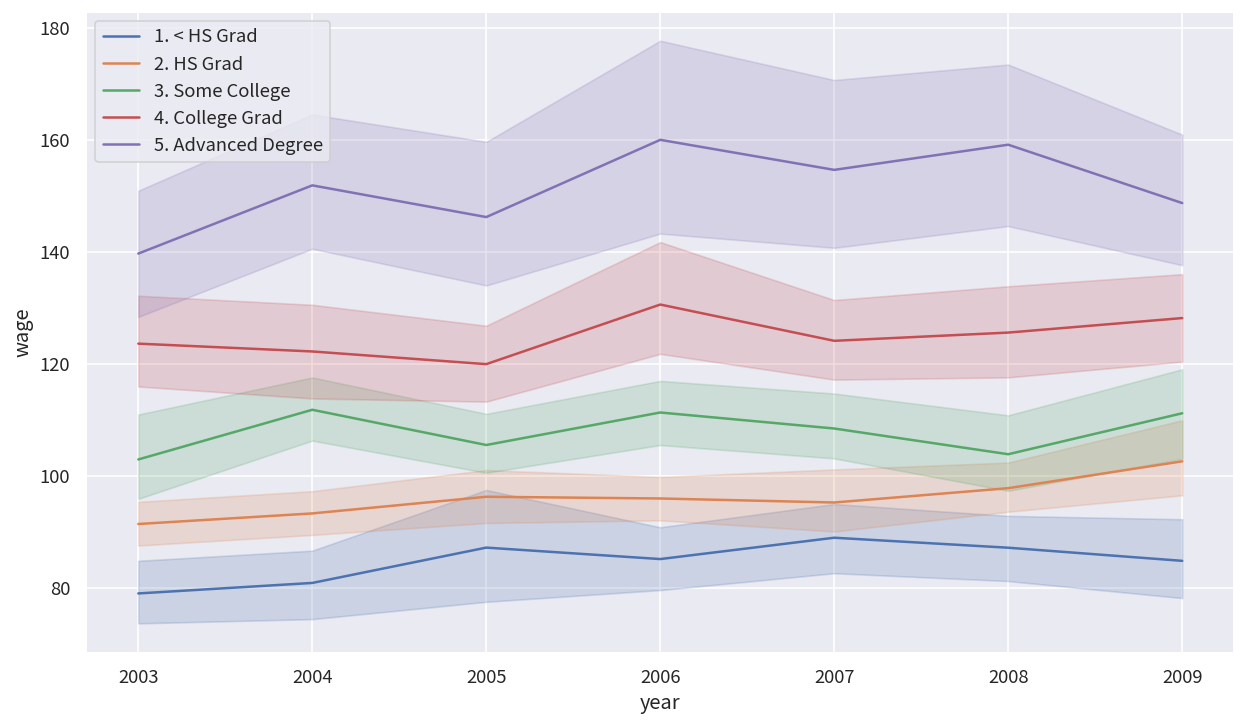

In [10]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 760         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용 (옵션 생략)

sb.lineplot(data=df1 , x='year', y='wage',hue = 'education') 


#3) 그래프 꾸미기 (생략)
#4) 출력
plt.legend(loc='upper left')
plt.grid()                            #배경 격자 표시 숨김
plt.tight_layout()                    #여백 제거
plt.savefig('myplot.png',dpi=my_dpi)  
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료